<a href="https://colab.research.google.com/github/dzailz/MFoML/blob/main/%D0%9A%D0%B0%D1%82%D0%B8%D0%BD_%D0%92_%D0%92_%D0%9C%D0%9E%D0%9C%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_DS_'Cars_Moldova'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import matplotlib.ticker as ticker
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas
import pandas as pd
from pandas.core.api import DataFrame # Библиотека Pandas для работы с табличными данными

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline 

from sklearn.preprocessing import PolynomialFeatures

# Данные без нормализации

Загружаем датафрейм с преобразованными категориальными данными

In [2]:
from typing import Any
def pd_read_csv(file: Any, delimiter: str = ",") -> DataFrame:
    return pd.read_csv(file, delimiter = delimiter)

In [3]:
df = pd_read_csv("https://raw.githubusercontent.com/dzailz/MFoML/main/cars_moldova_num.csv")
df.sample(6)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,price/km,luxury,eco,relative_age
13479,41,4,1991,9,125465.0,1600.0,4,1,1000.0,31,4047.258065,0.007970,0,0,1
18826,31,109,2010,6,166000.0,1500.0,0,1,5500.0,12,13833.333333,0.033133,0,0,1
5233,11,51,2001,4,160000.0,1242.0,4,1,2300.0,21,7619.047619,0.014375,0,0,1
30518,31,68,2016,3,178000.0,1500.0,0,1,12950.0,6,29666.666667,0.072753,0,0,0
12657,2,9,2012,10,132000.0,3000.0,2,0,17900.0,10,13200.000000,0.135606,1,1,0
8370,31,62,2013,6,200000.0,1500.0,0,1,6900.0,9,22222.222222,0.034500,0,0,0


Проверим, что отсутствуют данные типа `object`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32595 entries, 0 to 32594
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32595 non-null  int64  
 1   Model                 32595 non-null  int64  
 2   Year                  32595 non-null  int64  
 3   Style                 32595 non-null  int64  
 4   Distance              32595 non-null  float64
 5   Engine_capacity(cm3)  32595 non-null  float64
 6   Fuel_type             32595 non-null  int64  
 7   Transmission          32595 non-null  int64  
 8   Price(euro)           32595 non-null  float64
 9   Age                   32595 non-null  int64  
 10  km_year               32595 non-null  float64
 11  price/km              32595 non-null  float64
 12  luxury                32595 non-null  int64  
 13  eco                   32595 non-null  int64  
 14  relative_age          32595 non-null  int64  
dtypes: float64(5), int6

In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)', 'Age', 'km_year',
       'price/km', 'luxury', 'eco', 'relative_age'],
      dtype='object')

Добавим в списки колонки, которые ранее относились к категориальным и числовым признакам из числовых исключим цену на км пробега так-как она имеет отношение к целевому признаку

In [6]:
cat_columns = ["Make", "Model", "Style", "Fuel_type", "Transmission", "luxury", "eco", "relative_age"]
temp = ["price/km"]
num_columns = ["Year", "Distance", "Engine_capacity(cm3)", "Price(euro)", "Age", "km_year", ]

In [7]:
def metrics(y_test, y_predict):
    print(f"""
    MSE:  {mse(y_test, y_predict):.3f}
    RMSE: {mse(y_test, y_predict, squared=False):.3f}
    R2:   {r2_score(y_test, y_predict):.3f}
""")

Разобьем по выборкам только изначально числовые данные

In [8]:
df_num = df[num_columns].copy()
df_num.info()

X = df_num.drop(columns = ["Price(euro)"]).values
y = df_num["Price(euro)"].values

features_names = df_num.drop(columns = ["Price(euro)"]).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

pd.DataFrame(X_train).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32595 entries, 0 to 32594
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  32595 non-null  int64  
 1   Distance              32595 non-null  float64
 2   Engine_capacity(cm3)  32595 non-null  float64
 3   Price(euro)           32595 non-null  float64
 4   Age                   32595 non-null  int64  
 5   km_year               32595 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.5 MB


,0,1,2,3,4
0,1993.0,280000.0,1600.0,29.0,9655.172414
1,2011.0,23000.0,200.0,11.0,2090.909091
2,2011.0,200000.0,2000.0,11.0,18181.818182
3,2009.0,190000.0,2200.0,13.0,14615.384615
4,2014.0,185000.0,2000.0,8.0,23125.000000


Данные разделены на тренировочные и тестовые. Оставляем без нормализации.

Обучим модель

In [9]:
LR_lasso = make_pipeline(PolynomialFeatures(degree=(4, 7)), Lasso(alpha=1))
LR_lasso.fit(X_train, y_train)
y_predict=LR_lasso.predict(X_test);

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.696e+11, tolerance: 2.095e+08
  model = cd_fast.enet_coordinate_descent(


## Кросс-валидация

С помощью кросс валидации проверим модель

In [10]:
scores = {
    "R2": "r2",
    "-MSE": "neg_mean_squared_error",
    "-MAE": "neg_mean_absolute_error",
    "Max": "max_error"
    }

l1_cross = cross_validate(LR_lasso, X_train, y_train, scoring=scores, cv=ShuffleSplit(n_splits=5, random_state=22) )

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.401e+11, tolerance: 1.868e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.411e+11, tolerance: 1.899e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.417e+11, tolerance: 1.882e+08

In [11]:
df_l1_cross = pd.DataFrame(l1_cross)
df_l1_mean = pd.DataFrame(df_l1_cross.mean()).transpose()
display(df_l1_cross)
display(df_l1_mean)


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,24.294126,0.029687,0.725955,-2.731740e+07,-2680.537709,-95009.220137
1,23.498806,0.017861,0.705862,-2.530888e+07,-2691.539521,-88217.132314
2,22.985888,0.018821,0.733040,-2.494098e+07,-2703.845260,-70852.230355
3,26.615856,0.017648,0.714279,-3.020226e+07,-2775.046318,-95040.393559
4,23.880496,0.016712,0.723811,-2.446699e+07,-2689.239208,-88240.884954


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,24.255035,0.020146,0.72059,-2.644730e+07,-2708.041603,-87471.972264


In [12]:
print(f"Диапазон значений y: {y.max() - y.min()}")

Диапазон значений y: 99800.0


In [13]:
metrics(y_test, y_predict)


    MSE:  23573757.315
    RMSE: 4855.281
    R2:   0.736



In [14]:
def print_stem(y, label, marker):
    markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )
    markerline.set_markerfacecolor('none')

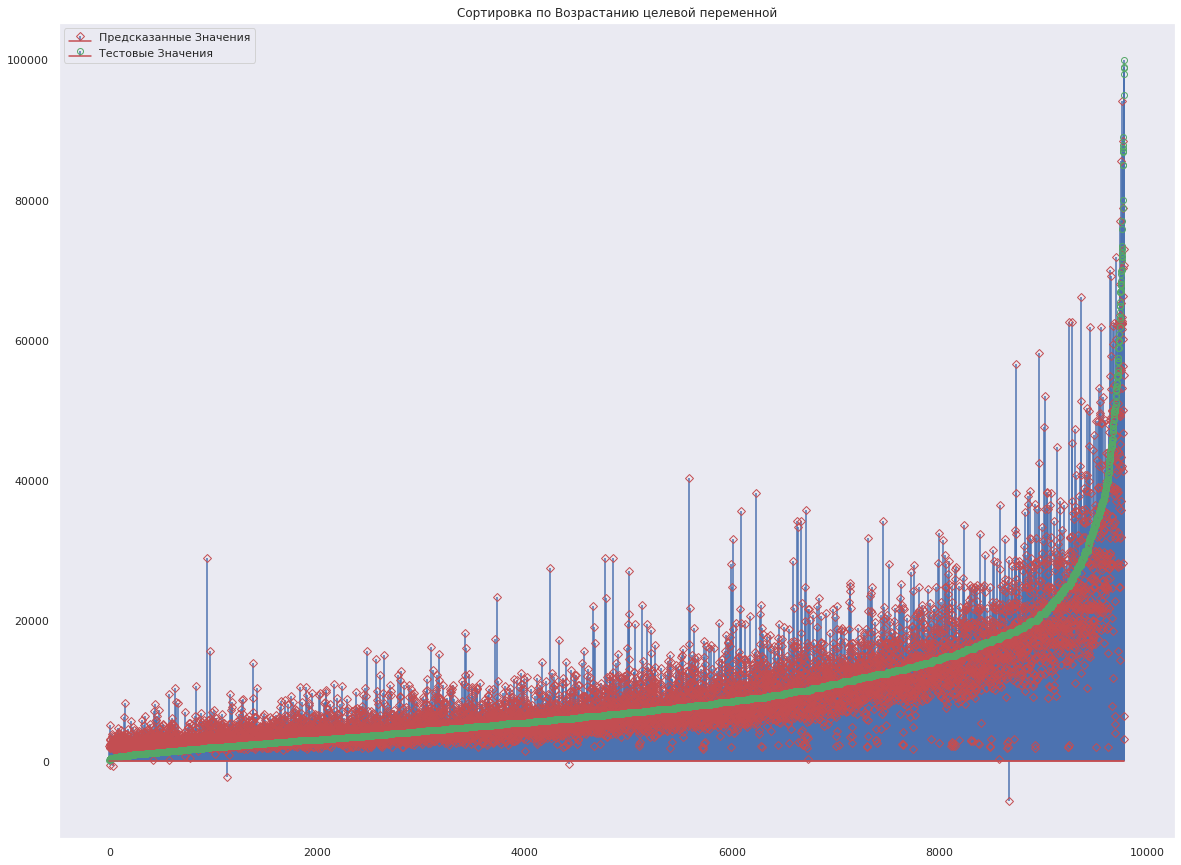

In [15]:
fig=plt.figure(figsize=(20, 15))
sorted = np.argsort(y_test)
print_stem(y_predict[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

Коэффициент детерминации R2 показывает 0.736, при кросс-валидации - 0,72, что для начала неплохо. Погрешность в пределах 5000 - RMSE, при диапазоне значений в 99800. Модель имеет слабую предсказательную способность, но показать тренд способна

# Нормализованные данные

In [16]:
# Считываем сохраненную таблицу с нормализованными данными, и проделываем те же действия
df_norm = pd_read_csv("https://raw.githubusercontent.com/dzailz/MFoML/main/cars_moldova_norm.csv")
df_norm[num_columns].head(5)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
0,0.80,0.194919,0.36,0.075651,0.20,0.353252
1,0.86,0.134913,0.30,0.083667,0.14,0.336172
2,0.82,0.109911,0.30,0.063627,0.18,0.218437
3,0.70,0.199920,0.32,0.039078,0.30,0.248497
4,0.58,0.299930,0.44,0.032966,0.42,0.271270


In [17]:
X_norm, y_norm = df_norm[num_columns].drop(columns = ['Price(euro)']).values, df_norm['Price(euro)'].values
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=22)

In [18]:
RR_norm = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha=0.00001))
RR_norm.fit(X_train_norm, y_train_norm)
y_predict_norm = RR_norm.predict(X_test_norm)

In [19]:
metrics(y_test_norm, y_predict_norm)


    MSE:  0.002
    RMSE: 0.049
    R2:   0.732



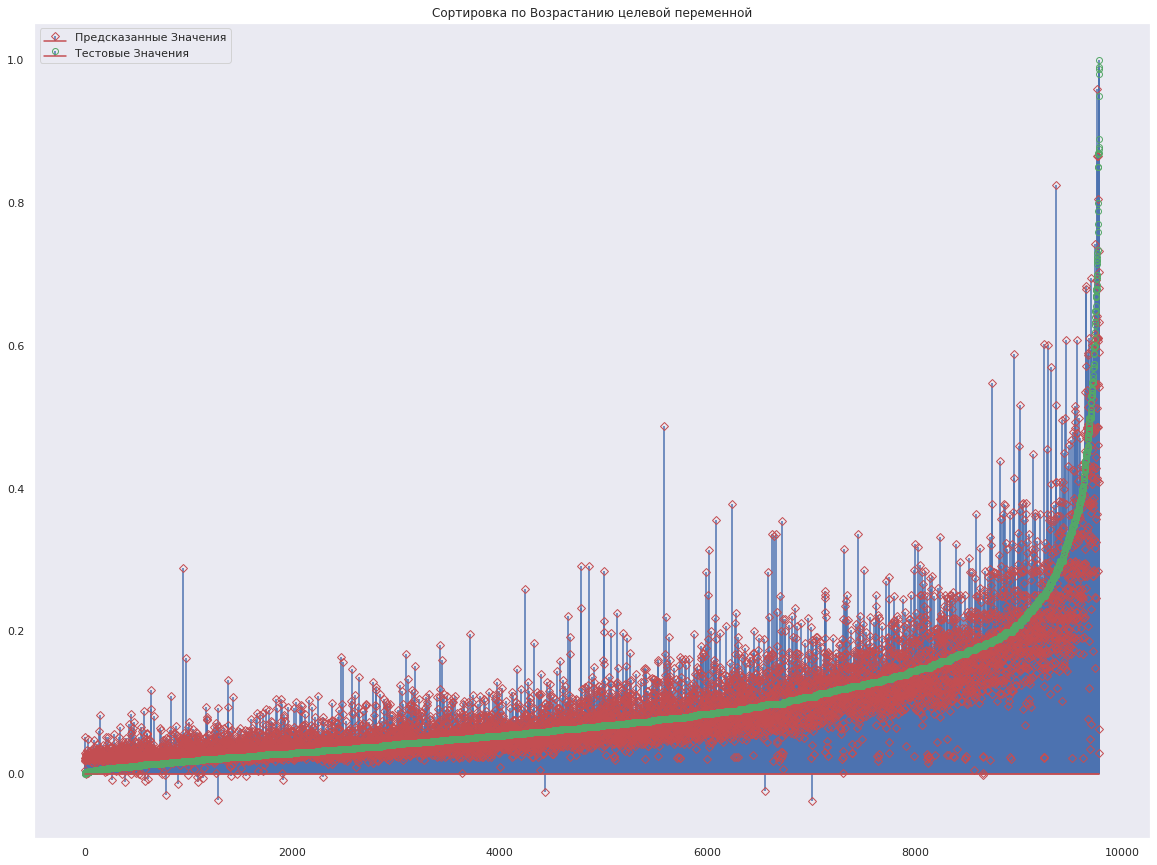

In [20]:
fig=plt.figure(figsize=(20, 15))
sorted = np.argsort(y_test_norm)
print_stem(y_predict_norm[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test_norm[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

R2 с нормализованными данными незначительно ухудшился, до 0,732.

# Стандартизированные данные

In [21]:
# Считываем сохраненную таблицу со стандартизированными данными
df_std = pd_read_csv("https://raw.githubusercontent.com/dzailz/MFoML/main/cars_moldova_stand.csv")
df_std[num_columns].head(5)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
0,0.371579,0.137604,-0.073059,-0.180885,-0.371579,0.384365
1,0.787743,-0.480459,-0.543659,-0.097067,-0.787743,0.268438
2,0.510300,-0.737985,-0.543659,-0.306611,-0.510300,-0.530687
3,-0.322027,0.189109,-0.386793,-0.563301,0.322027,-0.326655
4,-1.154355,1.219213,0.554408,-0.627212,1.154355,-0.172085


In [22]:
X_std, y_std = df_std[num_columns].drop(columns = ['Price(euro)']).values, df_std['Price(euro)'].values
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.5, random_state=22)

scaler = MinMaxScaler()
scaler.fit_transform(X_train_std)
X_train_std = scaler.transform(X_train_std) 
X_test_std = scaler.transform(X_test_std) 

In [23]:
LR_std = make_pipeline(PolynomialFeatures(degree=(1, 7)), Ridge(alpha=0.1))
LR_std.fit(X_train_std, y_train_std)
y_predict_std = LR_std.predict(X_test_std)

In [24]:
metrics(y_test_std, y_predict_std)


    MSE:  0.265
    RMSE: 0.515
    R2:   0.731



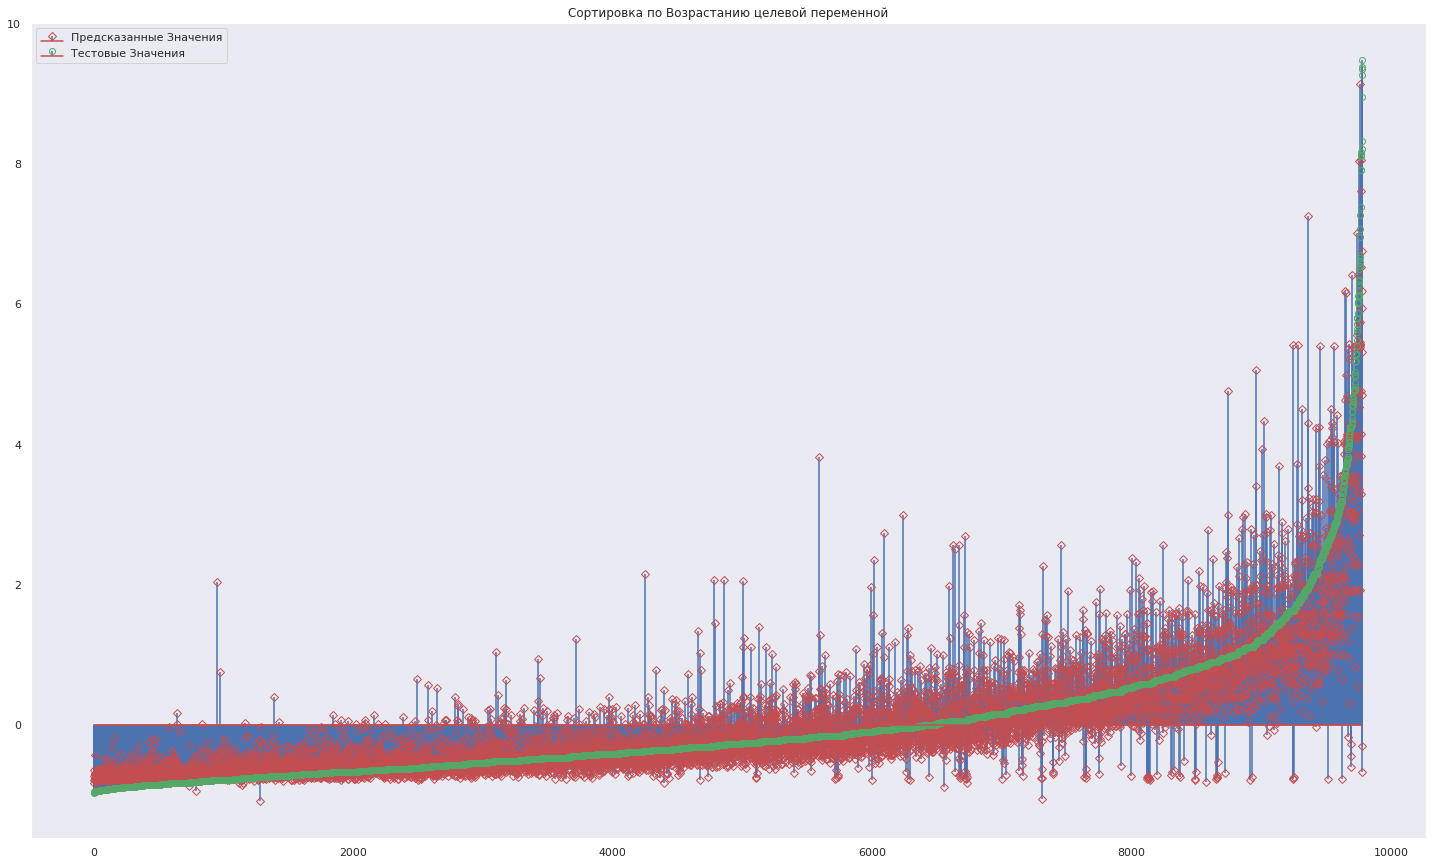

In [25]:
fig=plt.figure(figsize=(25, 15))
sorted = np.argsort(y_test_norm)
print_stem(y_predict_std[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test_std[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

Как и в случае с нормализованными данными коэффициент детерминации R2 показал схожее значение - 0,727. Это немного хуже, чем результат с "сырыми" данными - 0,736. 
Примененные методы к сожалению не дали результатов.

# One-hot encoding

In [26]:
# Считываем сохраненную таблицу с категориальными данными OneHotEncoding
df_ohe = pd_read_csv("https://raw.githubusercontent.com/dzailz/MFoML/main/cars_moldova_onehot.csv")
df_ohe.sample(10)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,price/km,Make_Alfa Romeo,Make_Audi,Make_BMW,...,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,luxury_no,luxury_yes,eco_no,eco_yes,relative_age_kind_old,relative_age_old
18882,2006,270000.0,3000.0,8501.0,16,16875.000000,0.031485,0,0,1,...,0,0,1,0,1,0,1,0,0,1
24046,2018,75562.0,2000.0,12600.0,4,18890.500000,0.166750,0,0,0,...,0,0,1,0,1,0,0,1,1,0
31521,2002,259000.0,2500.0,6999.0,20,12950.000000,0.027023,0,0,0,...,0,0,0,1,1,0,1,0,0,1
31129,2017,146408.0,1400.0,7390.0,5,29281.600000,0.050475,0,0,0,...,1,0,1,0,1,0,1,0,1,0
25354,2014,103000.0,2000.0,12999.0,8,12875.000000,0.126204,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4019,2015,204745.0,1500.0,7999.0,7,29249.285714,0.039068,0,0,0,...,0,0,1,0,1,0,1,0,1,0
21266,2015,230000.0,2400.0,14300.0,7,32857.142857,0.062174,0,0,0,...,0,1,1,0,0,1,0,1,1,0
12276,1996,292400.0,1600.0,2200.0,26,11246.153846,0.007524,0,1,0,...,1,0,0,1,1,0,1,0,0,1
15215,2005,220000.0,2500.0,9500.0,17,12941.176471,0.043182,0,0,0,...,0,0,0,1,1,0,1,0,0,1
2448,2011,270000.0,1256.0,4500.0,11,24545.454545,0.016667,0,0,0,...,0,0,0,1,1,0,1,0,0,1


In [27]:
X_ohe, y_ohe = df_ohe.drop(columns = ['Price(euro)']).values, df_ohe['Price(euro)'].values
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.3, random_state=22)

scaler = MinMaxScaler()
scaler.fit_transform(X_train_ohe)
X_train_ohe = scaler.transform(X_train_ohe) 
X_test_ohe = scaler.transform(X_test_ohe) 

In [28]:
LR = LinearRegression()
LR.fit(X_train_ohe, y_train_ohe)
y_predict_ohe = LR.predict(X_test_ohe)

In [29]:
metrics(y_test_ohe, y_predict_ohe)


    MSE:  28961413.404
    RMSE: 5381.581
    R2:   0.676



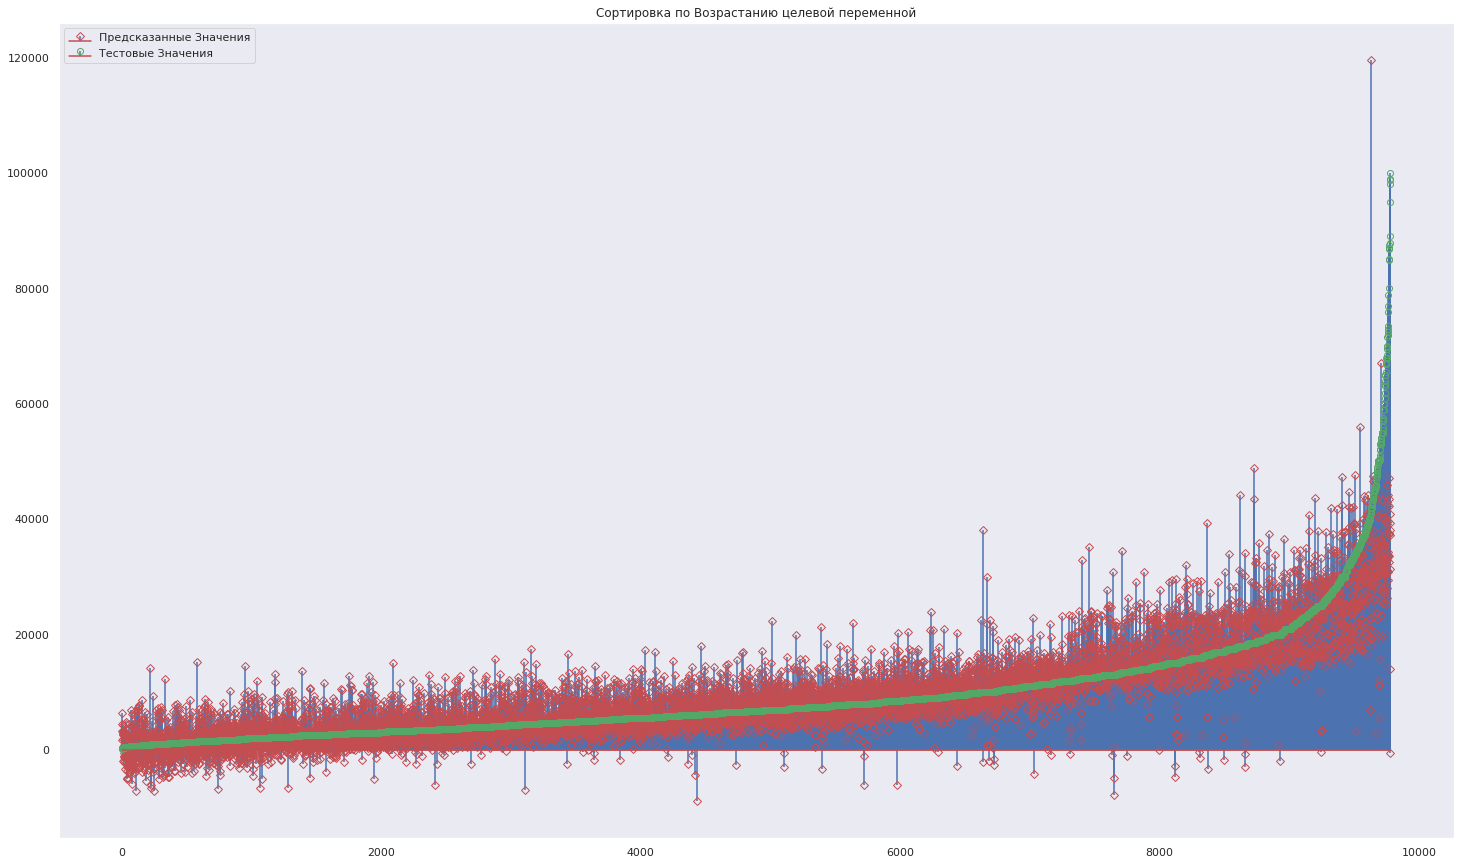

In [30]:
fig=plt.figure(figsize=(25, 15))
sorted = np.argsort(y_test_ohe)
print_stem(y_predict_ohe[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test_ohe[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

# Анализ весов

In [31]:
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

In [32]:
X_norm, y_norm = df_norm[num_columns].drop(columns = ['Price(euro)']).values, df_norm['Price(euro)'].values
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=22)

In [33]:
LR = LinearRegression()
LR.fit(X_train_norm, y_train_norm)
y_predict = LR.predict(X_test_norm)
metrics(y_test_norm, y_predict)


    MSE:  0.005
    RMSE: 0.069
    R2:   0.470



Линейная ргерессия показывает слабый результат R2 - 0.47



## Визуализация весов

In [34]:
def weights_vis(B, B0, features_names): 
    numbers = np.arange(0,len(features_names)+1)
    Bs = np.hstack([B0,B])
    tick_labels = ['B'+str(num) for num in numbers]
    cc=['']*len(numbers)
    for n,val in enumerate(Bs):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = Bs, color = cc)
    plt.xticks(np.arange(0,len(features_names)+1),np.hstack(['b0', features_names]),rotation = 45 );

In [35]:
B0 = LR.intercept_
B = LR.coef_
features_names = df_norm[num_columns].drop(columns = ['Price(euro)']).columns

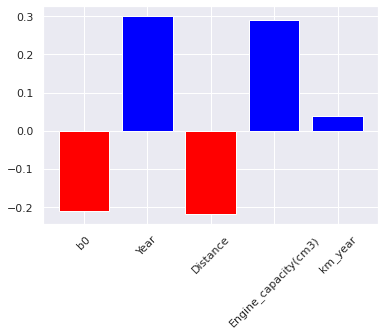

In [36]:
weights_vis(B, B0, features_names)

Наиболее значимые веса - **'Engine_capacity(cm3)', 'Year', 'Distance'**. Чем больше объем двигателя и позже год выпуска, тем дороже автомобиль. Соответственно, чем больше пробег, тем ниже цена.